# 3.2 线性回归的从零开始实现

In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.8.1


## 3.2.1 生成数据集

In [16]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
# 生成 1000 * 2 的 tensor
features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
# 生成带有噪音的样本 label
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

In [17]:
print(features[0], labels[0])

tensor([ 0.9158, -0.5869]) tensor(8.0366)


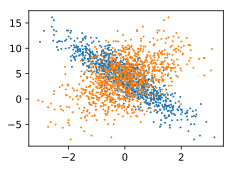

In [21]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

## 3.2.2 读取数据

In [67]:
# 读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    # 生成 0 ～ len 的 list
    indices = list(range(num_examples))
    # 样本的读取顺序是随机的
    random.shuffle(indices)
    # 从 0 开始, num_examples 结束，步长 batch_size
    for i in range(0, num_examples, batch_size):
        # 每一次迭代将 i ～ i + batch_size 列表索引作为 tensor
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)]) 
        yield  features.index_select(0, j), labels.index_select(0, j)

In [68]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3575,  1.2645],
        [-1.1079,  0.7383],
        [ 0.1635,  0.1884],
        [ 0.5343, -1.2518],
        [ 0.6085,  1.3170],
        [ 0.6052,  1.0468],
        [-1.1223,  0.0292],
        [-0.8334,  0.3350],
        [ 0.0938,  0.7955],
        [-0.1938, -0.3438]]) 
 tensor([ 0.6273, -0.5322,  3.8756,  9.5215,  0.9383,  1.8479,  1.8686,  1.3996,
         1.6820,  4.9792])


## 3.2.3 初始化模型参数

In [69]:
# 生成均值 0，方差 0.01 的 [2 * 1] 形状的 tensor
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
print(w, b)

tensor([[-0.0041],
        [-0.0015]]) tensor([0.])


In [70]:
# 声明记录梯度
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
print(w, b)
print(b.size)

tensor([[-0.0041],
        [-0.0015]], requires_grad=True) tensor([0.], requires_grad=True)
<built-in method size of Tensor object at 0x7fe157630708>


## 3.2.4 定义模型

In [71]:
# 定义线性回归模型
def linreg(X, w, b):
    return torch.mm(X, w) + b

## 3.2.5 定义损失函数

In [72]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 3.2.6 定义优化算法

In [73]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
#     print('params', params)
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

## 3.2.7 训练模型

In [74]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # 训练 num_epochs 次
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l 是有关小批量 X 和 y 的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 每次清零梯度不影响下次计算
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
#     print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

In [61]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9995],
        [-3.3988]], requires_grad=True)
4.2 
 tensor([4.1993], requires_grad=True)
